## 36122 final project client program
#### Sibo Zhang SID: 25520735

### import module

In [11]:
%run module.ipynb
## this is the client program for 36122 final project 
## uses module file located in the same folder

### news api integration

In [15]:
responses=headlines()
## retrieving headline news from newsapi

In [642]:
headline=[]
for item in responses:
    article=item.copy()
    ## avoiding aliasing by making a shallow copy of the article
    try:
        article=info_matcher(article)
        ## complete missing information in api response
    except Exception as e:
        print(e)
    finally:
        headline.append(article)

Access Denied
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Access Denied
Access Denied
Access Denied
Access Denied


In [643]:
for article in headline:
    source_category_matcher(article)
    ## classifying each article in the headline to a category predefined in newsapi module 

### webscalping with BeautifualSoap

In [644]:
for article in headline:
    try:
        ## substituting incomplete content from newsapi with the scalped ones
        article['content']=content_scalper(article)
    except Exception as e:
        print(e)
        continue

Access Denied
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Access Denied
Access Denied
Access Denied
Access Denied


### data processing and storing with Article class

In [647]:
## storing the topline articles in a class, with several complimentary functions
clipping=[]
for temp in headline:   
    tempclass=Article(temp['title'],temp['author'],temp['publishedAt'],temp['category'],
        temp['url'],temp['source']['name'],temp['content'])
    clipping.append(tempclass)

In [652]:
clipping[3].display()
## Showcasing the Article class functionality

Colorado Rockies fire manager Bud Black a day after losing 21-0 to San Diego - AP News

Author:Pat Graham

Published at 2025-05-12T01:51:00Z on Associated Press

Copyright 2025 The Associated Press. All Rights Reserved. Copyright 2025 The Associated Press. All Rights Reserved. Colorado Rockies manager Bud Black waits for relief pitcher Jake Bird to take the mound after removing starting pitcher Chase Dollander in the sixth inning of a baseball game against the Atlanta Braves, Wednesday, April 30, 2025, in Denver. (AP Photo/David Zalubowski) Colorado Rockies manager Bud Black walks toward the dugout after making a pitching change during the fifth inning of a baseball game against the San Francisco Giants in San Francisco, Sunday, May 4, 2025. (AP Photo/Jeff Chiu) Colorado Rockies pitcher Germán Márquez, middle right, walks toward the dugout as manager Bud Black, middle left, makes a pitching change during the fifth inning of a baseball game against the San Francisco Giants in San Franci

### data visualizations for feature distributions in dataset

In [896]:
clipping_2=get_news(number=50)
## optional feature to allow users to set preferences for the number of articles to fetch

In [897]:
## finding categories of articles
for item in clipping_2:
    source_category_matcher(item)

In [898]:
lst_category=[]
lst_source=[]
for item in clipping_2:
    lst_category.append(item['category'])
    lst_source.append(item['source']['name'])

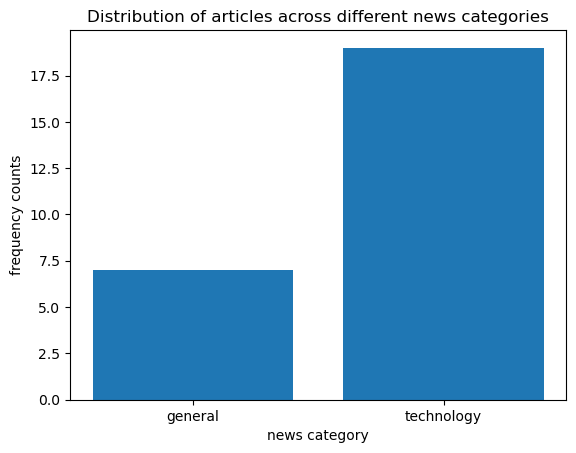

In [899]:
## data visuals for feature distributions within the dataset
unique,counts = np.unique([x for x in lst_category if x is not None], return_counts=True)
plt.bar(unique,counts);
plt.title('Distribution of articles across different news categories');
plt.xlabel('news category');
plt.ylabel('frequency counts');

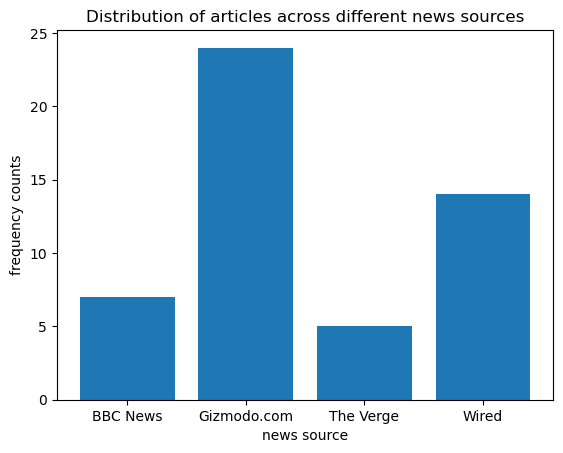

In [900]:
unique,counts = np.unique([x for x in lst_source if x is not None], return_counts=True)
plt.bar(unique,counts);
plt.title('Distribution of articles across different news sources');
plt.xlabel('news source');
plt.ylabel('frequency counts');

### GUI class for fetching top news

In [7]:
gui=Topnews()
## GUI to get top news with keywords input by the user and 
## display aggregate information for each news from search results

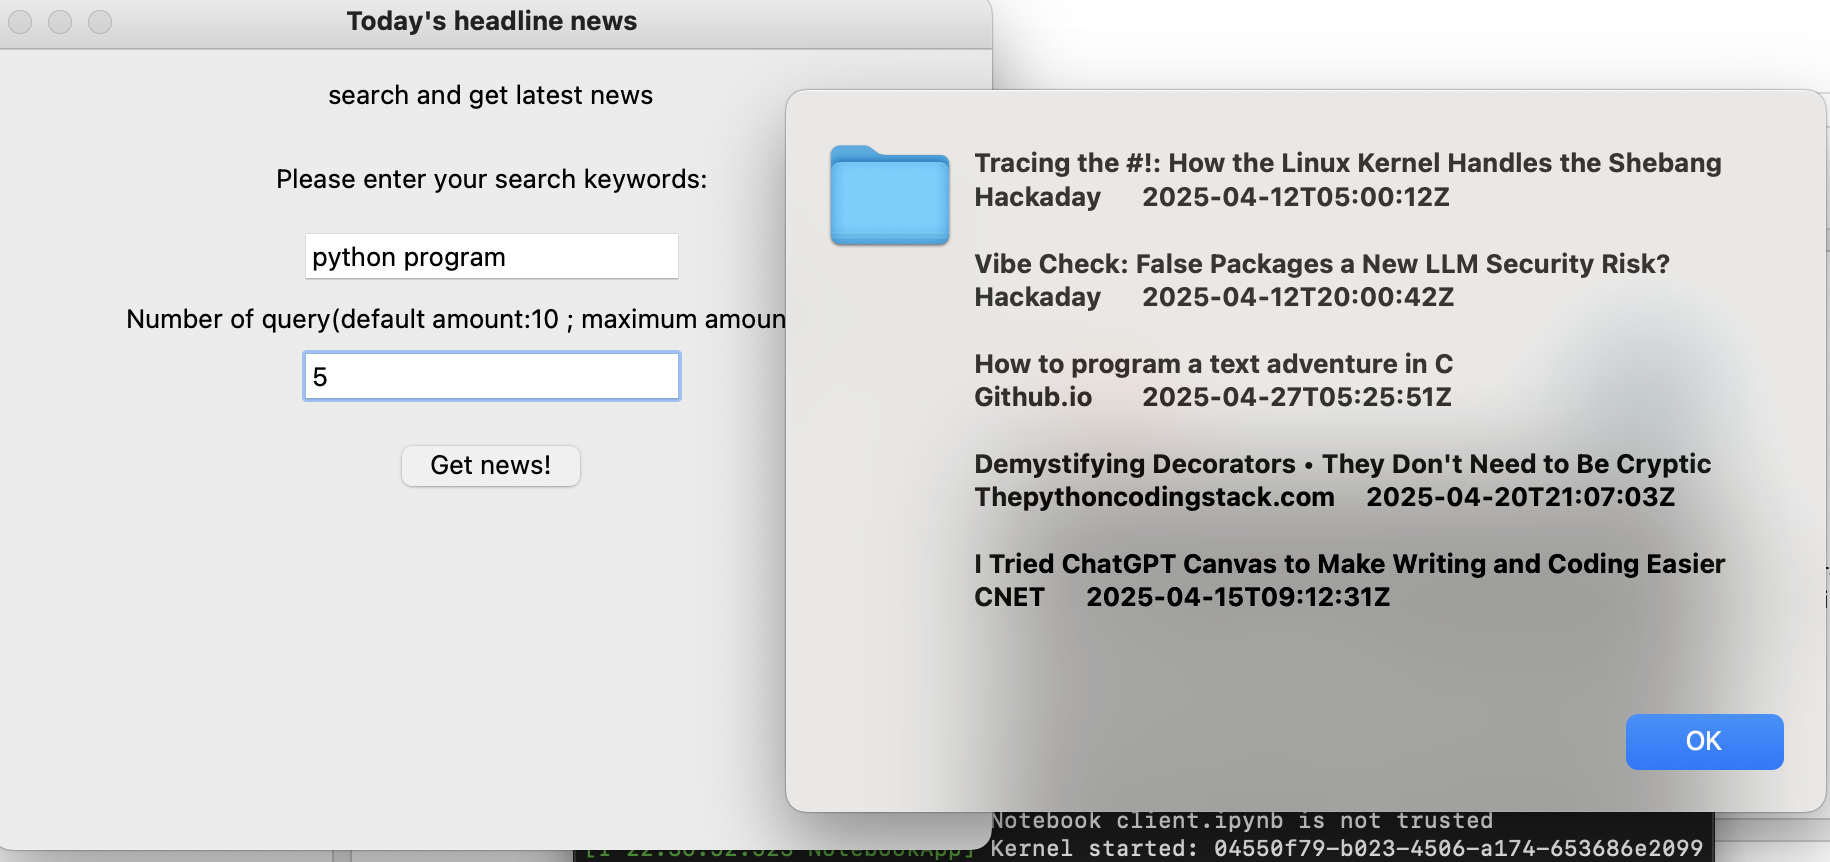

In [10]:
Image(filename='GUI_result.png')
## screenshot a search result

### unit tests for critical functions

In [29]:
class Info_matcher_TestCase(unittest.TestCase):
    #"""Tests for central function info_matcher in module.ipynb."""

    def test_null_article(self):
        #"""what if the article item contains no information?"""
        keys=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content']
        values=[None]*len(keys)
        empty_article= dict(zip(keys,values))
        result_article=info_matcher(empty_article)
        self.assertEqual(result_article, empty_article)


In [28]:
class Headlines_TestCase(unittest.TestCase):
    #"""Tests for the frequently-used function headlines in module.ipynb."""

    def test_source(self):
        #"""what if the user demands news from unknown sources?"""
        response=headlines(source='hello world')
        self.assertEqual(response, None)
        
    def test_category(self):
        #"""what if the user demands news with unknown categories?"""
        response=headlines(category='education')
        self.assertEqual(response, None)

In [30]:
unittest.main(argv=[''], verbosity=2, exit=False);
## these are failing tests, showing that info_matcher would raise exceptions if url is none in an article
## and headlines function need to specify the range of categories and sources

test_category (__main__.Headlines_TestCase) ... ERROR
test_source (__main__.Headlines_TestCase) ... FAIL
test_null_article (__main__.Info_matcher_TestCase) ... ERROR

ERROR: test_category (__main__.Headlines_TestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/0_/m_vjby993g77625mmpg_twz40000gn/T/ipykernel_1014/1375314848.py", line 11, in test_category
    response=headlines(category='education')
  File "/var/folders/0_/m_vjby993g77625mmpg_twz40000gn/T/ipykernel_1014/1341747135.py", line 9, in headlines
    result=api.get_top_headlines(category=category)
  File "/Users/william/anaconda3/lib/python3.10/site-packages/newsapi/newsapi_client.py", line 140, in get_top_headlines
    raise ValueError("invalid category")
ValueError: invalid category

ERROR: test_null_article (__main__.Info_matcher_TestCase)
----------------------------------------------------------------------
Traceback (most recent call last):
